### 2. Airline Usage
- Which terminal, boarding area have been most used?
Methodology:
Find out terminal and boarding area per passenger count : sum
Monthly usage as in average for busy terminal and boarding area

- Which airline provides low-fare and where is the destination?
Methodology:
Filter airline that provides low-fare and calculate total passenger count per destination(region) 



Import libraries and loaded data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date'])
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

- Which terminal, boarding area have been most used?
Methodology:
Find out terminal and boarding area per passenger count : sum


Calculate total number of yearly passenger per terminal and displayed using line chart

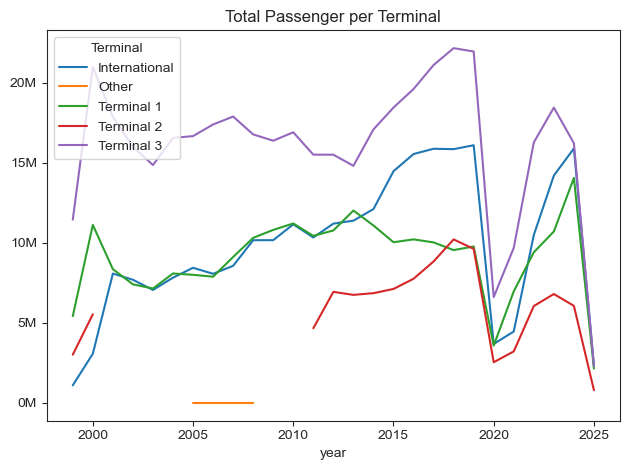

In [14]:
df.pivot_table(index='year',values='Passenger Count', columns='Terminal',aggfunc='sum').plot()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.title('Total Passenger per Terminal')
plt.tight_layout()
plt.show()

Calculate total number of yearly passenger per Boarding area and limited top 3 areas, displayed in a line chart

In [40]:
df_boarding = df.pivot_table(index='year',values='Passenger Count', columns='Boarding Area',aggfunc='sum')

df_boarding.loc['sum']=df_boarding.sum()
df_boarding = df_boarding.T.sort_values(by='sum',ascending=False).T
df_boarding.drop('sum',inplace=True)
df_boarding=df_boarding.iloc[:,:3]

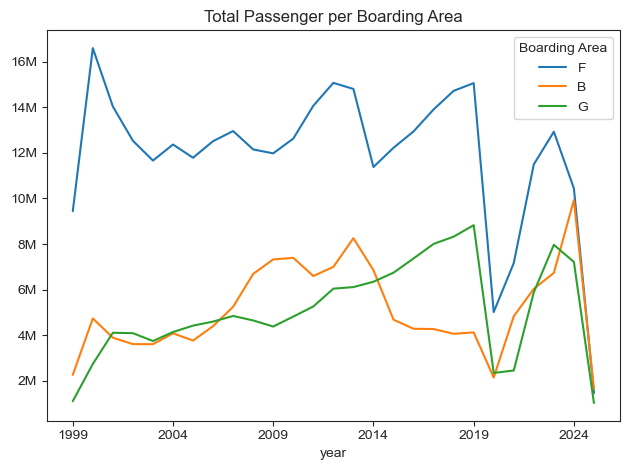

In [105]:
df_boarding.plot()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.title('Total Passenger per Boarding Area')
plt.tight_layout()
plt.show()

Filter dataframe using price category to focus on low-fare flights

In [79]:
df_low = df[df['Price Category Code']=='Low Fare']

Calculate total passenger number per airline

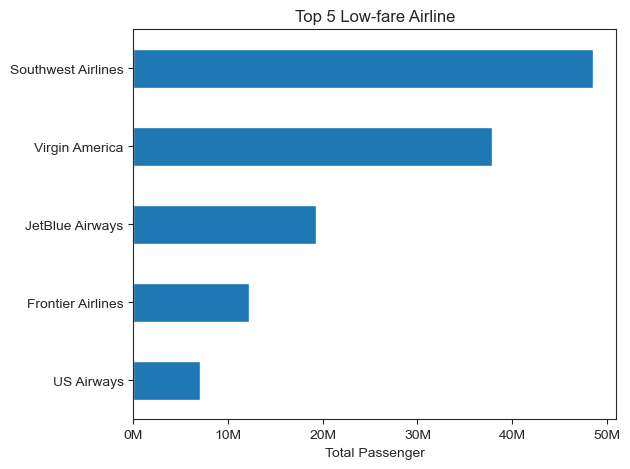

In [87]:
df_low.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head().plot(kind='barh')

plt.ylabel('')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.gca().invert_yaxis()
plt.title('Top 5 Low-fare Airline')
plt.xlabel('Total Passenger')
plt.tight_layout()
plt.show()

In [ ]:
# top 5 low-fare price provider
low_list = df_low.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head().index.to_list()
low_list

['Southwest Airlines',
 'Virgin America',
 'JetBlue Airways',
 'Frontier Airlines',
 'US Airways']

Visualize yearly trends of low-fare airlines 

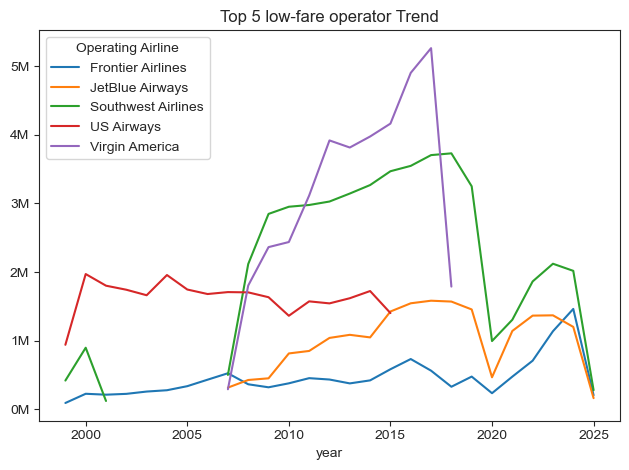

In [93]:
df[df['Operating Airline'].isin(low_list)].pivot_table(
    index='year',values='Passenger Count',aggfunc='sum',columns='Operating Airline').plot()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.title('Top 5 low-fare operator Trend')
plt.tight_layout()
plt.show()